In [294]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
import sklearn.preprocessing as prp
from sklearn.decomposition import PCA

# Tasca Feature Engineering

## Nivell 1
- Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Normalitza els atributs numèrics amb StandardScaler.

In [353]:
# Carreguem el dataset que vam generar a la pràctica anterior. En aquest dataset ja s'han netejat els valors nuls i s'han transformat les unitats de mesura americanes a sistema internacional. 
nba_players = pd.read_csv('../db/NBA PLAYERS STATS/player_data_Eur_units.csv', index_col=0)

In [296]:
nba_players.head()

,year_start,year_end,position,position_numeric,height,height cm,weight,weight Kg,birth_date,college
name,,,,,,,,,,
Alaa Abdelnaby,1991,1995,F-C,4,6-10,208,240.000,108.864,"June 24, 1968",Duke University
Zaid Abdul-Aziz,1969,1978,C-F,4,6-9,205,235.000,106.596,"April 7, 1946",Iowa State University
Kareem Abdul-Jabbar,1970,1989,C,5,7-2,218,225.000,102.060,"April 16, 1947","University of California, Los Angeles"
Mahmoud Abdul-Rauf,1991,2001,G,1,6-1,185,162.000,73.483,"March 9, 1969",Louisiana State University
Tariq Abdul-Wahad,1998,2003,F,3,6-6,198,223.000,101.153,"November 3, 1974",San Jose State University


In [297]:
# Fem un cop d'ull a les estadístiques i tipus de dades que tenim al dataset.
nba_players.describe(include='all')

,year_start,year_end,position,position_numeric,height,height cm,weight,weight Kg,birth_date,college
count,4213.000,4213.000,4213,4213.000,4213,4213.000,4213.000,4213.000,4213,4213
unique,NaN,NaN,7,NaN,28,NaN,NaN,NaN,3893,470
top,NaN,NaN,G,NaN,6-7,NaN,NaN,NaN,"August 26, 1947",University of Kentucky
freq,NaN,NaN,1501,NaN,441,NaN,NaN,NaN,3,99
mean,1984.063,1988.268,NaN,2.485,NaN,197.235,207.716,94.220,NaN,NaN
std,20.700,21.592,NaN,1.345,NaN,9.045,25.448,11.543,NaN,NaN
min,1947.000,1947.000,NaN,1.000,NaN,160.000,133.000,60.329,NaN,NaN
25%,1969.000,1972.000,NaN,1.000,NaN,190.000,189.000,85.730,NaN,NaN
50%,1985.000,1990.000,NaN,3.000,NaN,198.000,205.000,92.988,NaN,NaN
75%,2001.000,2007.000,NaN,3.000,NaN,205.000,225.000,102.060,NaN,NaN


In [298]:
nba_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, Alaa Abdelnaby to Matt Zunic
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year_start        4213 non-null   int64  
 1   year_end          4213 non-null   int64  
 2   position          4213 non-null   object 
 3   position_numeric  4213 non-null   int64  
 4   height            4213 non-null   object 
 5   height cm         4213 non-null   int64  
 6   weight            4213 non-null   float64
 7   weight Kg         4213 non-null   float64
 8   birth_date        4213 non-null   object 
 9   college           4213 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 362.1+ KB


In [354]:
# Reconvertim les dades de la columna 'birth_date' a format 'datetime' i afegim la columna 'birht_year'. També reconvertim les posicions númeriques dels jugadors a 'object' ja que encara que son números son dates categóriques. 
nba_players['birth_date'] = pd.to_datetime(nba_players['birth_date'])
nba_players['birth_year'] = nba_players['birth_date'].dt.year
nba_players['birth_month'] = nba_players['birth_date'].dt.month.astype(object)
nba_players['position_numeric'] = nba_players['position_numeric'].astype(object)
nba_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, Alaa Abdelnaby to Matt Zunic
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year_start        4213 non-null   int64         
 1   year_end          4213 non-null   int64         
 2   position          4213 non-null   object        
 3   position_numeric  4213 non-null   object        
 4   height            4213 non-null   object        
 5   height cm         4213 non-null   int64         
 6   weight            4213 non-null   float64       
 7   weight Kg         4213 non-null   float64       
 8   birth_date        4213 non-null   datetime64[ns]
 9   college           4213 non-null   object        
 10  birth_year        4213 non-null   int64         
 11  birth_month       4213 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 427.9+ KB


In [355]:
nba_players

,year_start,year_end,position,position_numeric,height,height cm,weight,weight Kg,birth_date,college,birth_year,birth_month
name,,,,,,,,,,,,
Alaa Abdelnaby,1991,1995,F-C,4,6-10,208,240.000,108.864,1968-06-24,Duke University,1968,6
Zaid Abdul-Aziz,1969,1978,C-F,4,6-9,205,235.000,106.596,1946-04-07,Iowa State University,1946,4
Kareem Abdul-Jabbar,1970,1989,C,5,7-2,218,225.000,102.060,1947-04-16,"University of California, Los Angeles",1947,4
Mahmoud Abdul-Rauf,1991,2001,G,1,6-1,185,162.000,73.483,1969-03-09,Louisiana State University,1969,3
Tariq Abdul-Wahad,1998,2003,F,3,6-6,198,223.000,101.153,1974-11-03,San Jose State University,1974,11
...,...,...,...,...,...,...,...,...,...,...,...,...
Derrick Zimmerman,2006,2006,G,1,6-3,190,195.000,88.452,1981-12-02,Mississippi State University,1981,12
Stephen Zimmerman,2017,2017,C,5,7-0,213,240.000,108.864,1996-09-09,"University of Nevada, Las Vegas",1996,9
Jim Zoet,1983,1983,C,5,7-1,215,240.000,108.864,1953-12-20,Kent State University,1953,12


In [360]:
# Generem un nou dataframe eliminant les columnes que no generen cap interes o que contenen informació duplicada com les dades de pes i alçada en unitats americanes, la possició en notació americana i la data de neixement en format data i el 'college'

nba_players = nba_players[['birth_year', 'birth_month','year_start','year_end','position_numeric','height cm','weight Kg']]
nba_players

,birth_year,birth_month,year_start,year_end,position_numeric,height cm,weight Kg
name,,,,,,,
Alaa Abdelnaby,1968,6,1991,1995,4,208,108.864
Zaid Abdul-Aziz,1946,4,1969,1978,4,205,106.596
Kareem Abdul-Jabbar,1947,4,1970,1989,5,218,102.060
Mahmoud Abdul-Rauf,1969,3,1991,2001,1,185,73.483
Tariq Abdul-Wahad,1974,11,1998,2003,3,198,101.153
...,...,...,...,...,...,...,...
Derrick Zimmerman,1981,12,2006,2006,1,190,88.452
Stephen Zimmerman,1996,9,2017,2017,5,213,108.864
Jim Zoet,1953,12,1983,1983,5,215,108.864


In [361]:
# Generem els dummies de les 'features' birht_month i position numeric. 
# Utiliztant el médote get dummies indicant el kwarg 'column' la matriu de dummies s'agrega al dataframe directament i no cal fer el 'concat'
nba_dummies = pd.get_dummies(nba_players, prefix={'birth_month':'month','position_numeric': 'pos'},prefix_sep=' ',columns=['birth_month', 'position_numeric'])
nba_dummies.head()

,birth_year,year_start,year_end,height cm,weight Kg,month 1,month 2,month 3,month 4,month 5,...,month 8,month 9,month 10,month 11,month 12,pos 1,pos 2,pos 3,pos 4,pos 5
name,,,,,,,,,,,,,,,,,,,,,
Alaa Abdelnaby,1968,1991,1995,208,108.864,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Zaid Abdul-Aziz,1946,1969,1978,205,106.596,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
Kareem Abdul-Jabbar,1947,1970,1989,218,102.060,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
Mahmoud Abdul-Rauf,1969,1991,2001,185,73.483,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Tariq Abdul-Wahad,1974,1998,2003,198,101.153,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [369]:
# Un cop que totes les varables son numériques estandaritzem els valors de les variables numèriques utilitzant StandardScaler

# Definim quin tipus d'escaclat utilitzarem
scaler = prp.StandardScaler()

# Apliquem l'escalat a les variables desitjates
scaler_fit = scaler.fit(nba_dummies)

# mostrem els parametres obtinguts:

standarization_analisis = pd.DataFrame([scaler.scale_, scaler.mean_, scaler.var_], columns=nba_dummies.columns, index=['scale', 'mean', 'var'])
print(scaler_fit)
print(scaler.get_params())
standarization_analisis


StandardScaler()
{'copy': True, 'with_mean': True, 'with_std': True}


,birth_year,year_start,year_end,height cm,weight Kg,month 1,month 2,month 3,month 4,month 5,...,month 8,month 9,month 10,month 11,month 12,pos 1,pos 2,pos 3,pos 4,pos 5
scale,21.371,20.697,21.590,9.044,11.542,0.278,0.278,0.286,0.262,0.268,...,0.274,0.281,0.281,0.273,0.269,0.479,0.335,0.452,0.340,0.295
mean,1960.108,1984.063,1988.268,197.235,94.220,0.084,0.085,0.090,0.074,0.078,...,0.082,0.086,0.086,0.081,0.078,0.356,0.128,0.285,0.134,0.096
var,456.733,428.378,466.109,81.795,133.212,0.077,0.078,0.082,0.069,0.072,...,0.075,0.079,0.079,0.075,0.072,0.229,0.112,0.204,0.116,0.087


In [374]:
# Creem un nou dataframe amb els valors normalitzats 
nba_scaled = scaler.transform(nba_dummies)
nba_scaled = pd.DataFrame(nba_scaled, columns=nba_dummies.columns, index=nba_dummies.index)
nba_scaled.head()


,birth_year,year_start,year_end,height cm,weight Kg,month 1,month 2,month 3,month 4,month 5,...,month 8,month 9,month 10,month 11,month 12,pos 1,pos 2,pos 3,pos 4,pos 5
name,,,,,,,,,,,,,,,,,,,,,
Alaa Abdelnaby,0.369,0.335,0.312,1.190,1.269,-0.303,-0.304,-0.315,-0.283,-0.290,...,-0.298,-0.308,-0.308,-0.297,-0.292,-0.744,-0.384,-0.632,2.546,-0.327
Zaid Abdul-Aziz,-0.660,-0.728,-0.476,0.859,1.072,-0.303,-0.304,-0.315,3.530,-0.290,...,-0.298,-0.308,-0.308,-0.297,-0.292,-0.744,-0.384,-0.632,2.546,-0.327
Kareem Abdul-Jabbar,-0.613,-0.679,0.034,2.296,0.679,-0.303,-0.304,-0.315,3.530,-0.290,...,-0.298,-0.308,-0.308,-0.297,-0.292,-0.744,-0.384,-0.632,-0.393,3.062
Mahmoud Abdul-Rauf,0.416,0.335,0.590,-1.353,-1.797,-0.303,-0.304,3.176,-0.283,-0.290,...,-0.298,-0.308,-0.308,-0.297,-0.292,1.344,-0.384,-0.632,-0.393,-0.327
Tariq Abdul-Wahad,0.650,0.673,0.682,0.085,0.601,-0.303,-0.304,-0.315,-0.283,-0.290,...,-0.298,-0.308,-0.308,3.364,-0.292,-0.744,-0.384,1.583,-0.393,-0.327


In [381]:
#Comprobem que la standarització s'ha fet correctament --> (Mean = 0; std = 1)
pd.set_option('float_format', '{:.3f}'.format)
nba_scaled.describe()

,birth_year,year_start,year_end,height cm,weight Kg,month 1,month 2,month 3,month 4,month 5,...,month 8,month 9,month 10,month 11,month 12,pos 1,pos 2,pos 3,pos 4,pos 5
count,4213.000,4213.000,4213.000,4213.000,4213.000,4213.000,4213.000,4213.000,4213.000,4213.000,...,4213.000,4213.000,4213.000,4213.000,4213.000,4213.000,4213.000,4213.000,4213.000,4213.000
mean,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,...,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.204,-1.791,-1.911,-4.117,-2.936,-0.303,-0.304,-0.315,-0.283,-0.290,...,-0.298,-0.308,-0.308,-0.297,-0.292,-0.744,-0.384,-0.632,-0.393,-0.327
25%,-0.707,-0.728,-0.753,-0.800,-0.736,-0.303,-0.304,-0.315,-0.283,-0.290,...,-0.298,-0.308,-0.308,-0.297,-0.292,-0.744,-0.384,-0.632,-0.393,-0.327
50%,0.042,0.045,0.080,0.085,-0.107,-0.303,-0.304,-0.315,-0.283,-0.290,...,-0.298,-0.308,-0.308,-0.297,-0.292,-0.744,-0.384,-0.632,-0.393,-0.327
75%,0.790,0.818,0.868,0.859,0.679,-0.303,-0.304,-0.315,-0.283,-0.290,...,-0.298,-0.308,-0.308,-0.297,-0.292,1.344,-0.384,1.583,-0.393,-0.327
max,1.773,1.640,1.377,3.733,5.985,3.297,3.287,3.176,3.530,3.447,...,3.354,3.252,3.252,3.364,3.430,1.344,2.605,1.583,2.546,3.062


## Nivell 2

- Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [382]:
# Abans de realitzar el PCA fem unanalisis de quines variables en

data = nba_scaled.corr()

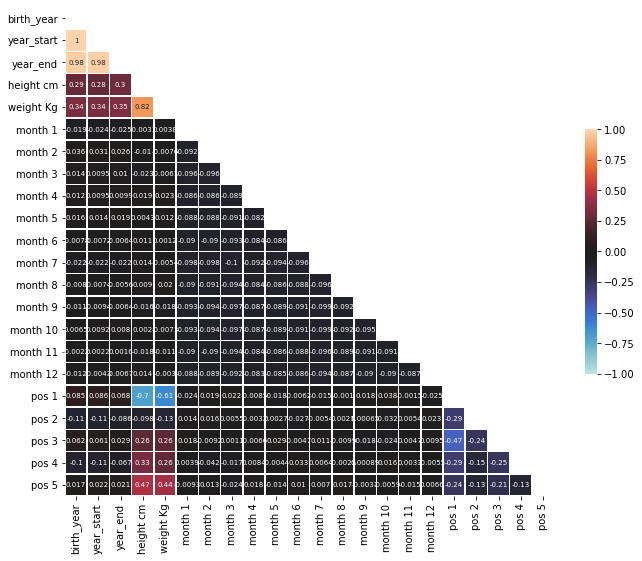

In [411]:
pd.set_option('float_format', '{:.2f}'.format)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(data, dtype=bool), k=0)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data,annot=True, mask=mask, annot_kws={"size":7}, square=True, linewidths=.5, cbar_kws={"shrink": .5}, robust=False, center=0, vmin=-1, vmax=1)
plt.show()

In [394]:
# Fent un analisis rapid veiem que el mes de naiement no te practicament cap tipu de correclació amb cap variable. Eliminem aquests dummies i tornem a mostrar el grafic:
data2 = nba_scaled[['birth_year', 'year_start', 'year_end', 'height cm', 'weight Kg','pos 1', 'pos 2', 'pos 3', 'pos 4', 'pos 5']]
data2_corr = data2.corr()

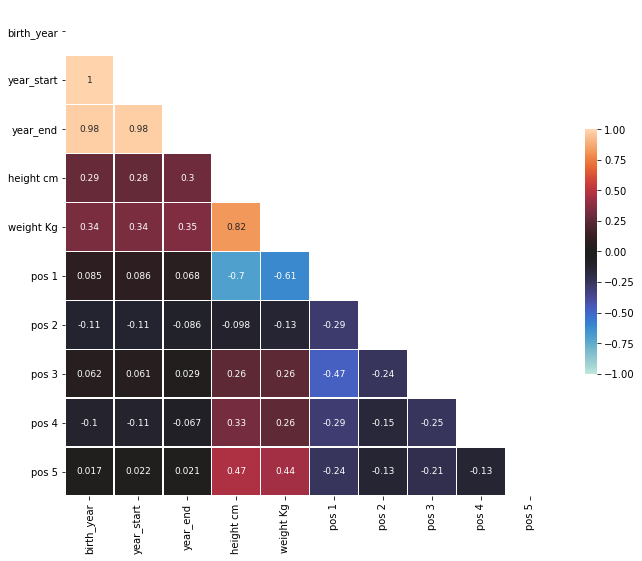

In [412]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(data2_corr, dtype=bool), k=0)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data2_corr,annot=True, mask=mask, annot_kws={"size":9}, square=True, linewidths=.5, cbar_kws={"shrink": .5}, robust=False, center=0, vmin=-1, vmax=1)
plt.show()

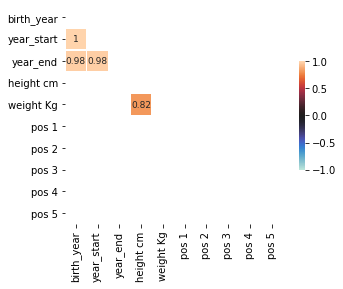

In [410]:
#Mostrem els atrbuts que amb alta correlació:
high_corr = data2_corr[(data2_corr>=0.8) | (data2_corr<=-0.8)]
mask = np.triu(np.ones_like(data2_corr, dtype=bool), k=0)
sns.heatmap(high_corr,annot=True, mask=mask, annot_kws={"size":9}, square=True, linewidths=.5, cbar_kws={"shrink": .5}, robust=False, center=0, vmin=-1, vmax=1)
plt.show()

# Analitzant aquest segón heatmap de correlacions podem veure com les birth_year, year_start i year_end tenen una correlació molt forta entre elles >0.98
# Els atributs "weight Kg" i "Height_cm" també mostren una alta correlació >0.8 
# En base a aquests resultats prescindim de les variables "year_start", "year_end" i "weight Kg" per fer el PCA. 

In [416]:
# Creem un dataframe amb els atributs seleccionats finalment

nba_for_PCA = nba_scaled[['birth_year','height cm','pos 1', 'pos 2', 'pos 3', 'pos 4', 'pos 5']]
nba_for_PCA.head()

,birth_year,height cm,pos 1,pos 2,pos 3,pos 4,pos 5
name,,,,,,,
Alaa Abdelnaby,0.37,1.19,-0.74,-0.38,-0.63,2.55,-0.33
Zaid Abdul-Aziz,-0.66,0.86,-0.74,-0.38,-0.63,2.55,-0.33
Kareem Abdul-Jabbar,-0.61,2.30,-0.74,-0.38,-0.63,-0.39,3.06
Mahmoud Abdul-Rauf,0.42,-1.35,1.34,-0.38,-0.63,-0.39,-0.33
Tariq Abdul-Wahad,0.65,0.08,-0.74,-0.38,1.58,-0.39,-0.33


In [417]:
# Generem el model de PCA

pca = PCA()
pca.fit(nba_for_PCA)
print(pca.explained_variance_ratio_)
print()
print(pca.singular_values_)

[3.10296089e-01 1.91234750e-01 1.82476483e-01 1.63560553e-01
 1.33032316e-01 1.93998087e-02 1.46213834e-32]

[9.56605559e+01 7.50979628e+01 7.33581213e+01 6.94518846e+01
 6.26359006e+01 2.39190250e+01 2.07653369e-14]


In [422]:
data = pca.components_
columns = nba_for_PCA.columns
index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

pc_analisis = pd.DataFrame(data, columns=columns, index=index)
pc_analisis

,birth_year,height cm,pos 1,pos 2,pos 3,pos 4,pos 5
PC1,-0.12,-0.63,0.59,0.04,-0.29,-0.22,-0.31
PC2,-0.44,-0.00,-0.17,0.47,-0.58,0.46,0.10
PC3,0.33,0.18,0.36,-0.44,-0.50,0.16,0.50
PC4,-0.11,-0.01,0.06,-0.50,0.12,0.69,-0.50
PC5,-0.76,-0.11,-0.00,-0.43,0.18,-0.17,0.40
PC6,0.29,-0.74,-0.42,-0.07,0.10,0.24,0.33
PC7,0.00,0.00,0.55,0.39,0.52,0.39,0.34


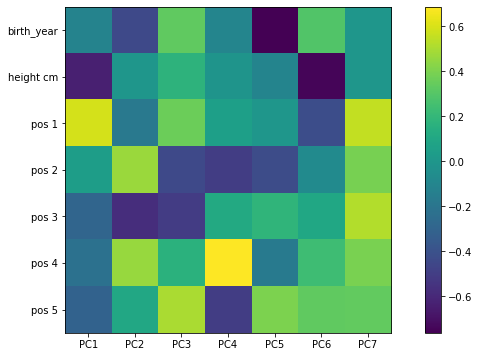

In [433]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
componentes = data
plt.imshow(componentes.T, cmap='viridis') # Plotegem la matriu de correlació transposada ".T"
plt.yticks(range(len(pc_analisis.columns)), pc_analisis.columns)
plt.xticks(range(len(pc_analisis.columns)), index)
plt.grid(False)
plt.colorbar();

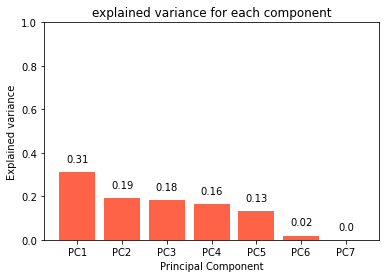

In [482]:
# Mostrem quin percentatge de variança explica cada component 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar( x= pc_analisis.index, height= pca.explained_variance_ratio_, color='tomato')

for x, y in zip(pc_analisis.index, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_xticks(np.arange(pca.n_components_))
ax.set_ylim(0, 1)
ax.set_title('explained variance for each component')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained variance');

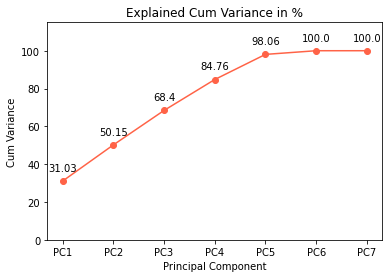

In [483]:
# Plotegem el % de variança acumulada per triar amb quants PCA podem fer un bon análisis:
cum_var  = pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(pc_analisis.index, cum_var*100, marker = 'o', color='tomato')

for x, y in zip(pc_analisis.index, cum_var*100):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 115)
ax.set_xticks(np.arange(pca.n_components_))
ax.set_title('Explained Cum Variance in %')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cum Variance');



Comnentari general: 

Despres de fer el PCA podem observar que amb nomes 4 components podem aproximanrnos al 84.5% de la variança de la mostra i amb 5 components fins a un 98.06%

## Nivell 3
- Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

Utilizarem 3 métodes diferents per detectar els ouliers: ow to detect Outliers:

* Visualització: 
Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plot. 
* IQR SCORE: Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
* CAPPING: Any value which out of range of 5th and 95th percentile can be considered as outlier
* DATA POINTS: three or more standard deviation away from mean are considered outlier

In [548]:
nba_outliers = nba_dummies[['birth_year','height cm','weight Kg','pos 1', 'pos 2', 'pos 3', 'pos 4', 'pos 5']]
nba_outliers.describe([.01,.25,.5,.75,.90])

,birth_year,height cm,weight Kg,pos 1,pos 2,pos 3,pos 4,pos 5
count,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00
mean,1960.11,197.24,94.22,0.36,0.13,0.29,0.13,0.10
std,21.37,9.05,11.54,0.48,0.33,0.45,0.34,0.30
min,1913.00,160.00,60.33,0.00,0.00,0.00,0.00,0.00
1%,1918.00,177.00,72.58,0.00,0.00,0.00,0.00,0.00
25%,1945.00,190.00,85.73,0.00,0.00,0.00,0.00,0.00
50%,1961.00,198.00,92.99,0.00,0.00,0.00,0.00,0.00
75%,1977.00,205.00,102.06,1.00,0.00,1.00,0.00,0.00
90%,1989.00,208.00,108.86,1.00,1.00,1.00,1.00,0.00
max,1998.00,231.00,163.30,1.00,1.00,1.00,1.00,1.00


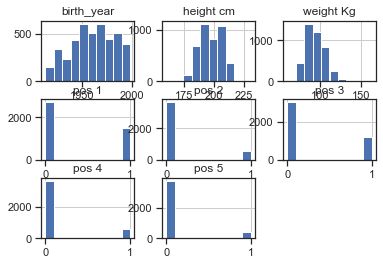

In [594]:
nba_outliers.hist()
plt.show()

- Analitzem els outliers per visualització: 

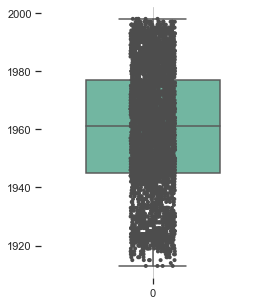

In [554]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(4, 5))
# Plot the orbital period with horizontal boxes
sns.boxplot(data=nba_outliers['birth_year'],width=.6, palette="Set2")
# Add in points to show each observation
sns.stripplot(data=nba_outliers['birth_year'], size=4, color=".3", linewidth=0)
# Plot the orbital period with horizontal boxes
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


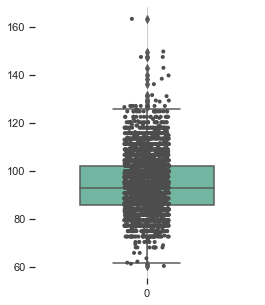

In [555]:
f, ax = plt.subplots(figsize=(4, 5))
# Plot the orbital period with horizontal boxes
sns.boxplot(data=nba_outliers['weight Kg'], width=.6, palette="Set2")
# Add in points to show each observation
sns.stripplot(data=nba_outliers['weight Kg'],size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Analitzant els outliers per viusalització veiem que la variable birth_year no te outliers mentres que la variable weight_Kg te outliers per la part superior. 

- Calculem els outliers per Capping "Outlier <10% - 90%> Outlier"

In [573]:

tres_low = nba_outliers.quantile(0.1)
tres_high = nba_outliers.quantile(0.9)
capping_range = tres_low, tres_high, (nba_outliers < tres_low).sum(), (nba_outliers > tres_high).sum()
capping_df = pd.DataFrame(capping_range, index=['Outlier Treshold low', 'Outlier Treshold high', 'number of outliers(low)', 'number of outliers(high)'])
capping_df

,birth_year,height cm,weight Kg,pos 1,pos 2,pos 3,pos 4,pos 5
Outlier Treshold low,1928.00,185.00,79.38,0.00,0.00,0.00,0.00,0.00
Outlier Treshold high,1989.00,208.00,108.86,1.00,1.00,1.00,1.00,0.00
number of outliers(low),416.00,270.00,260.00,0.00,0.00,0.00,0.00,0.00
number of outliers(high),396.00,392.00,403.00,0.00,0.00,0.00,0.00,406.00


- Calculem els outliers segons el IQRScore

In [574]:
Q1 = nba_outliers.quantile(0.25)
Q3 = nba_outliers.quantile(0.75)
iqr = Q3 - Q1
tres_low = Q1 - 1.5*iqr
tres_high = Q3 + 1.5*iqr
iqr_range = tres_low, tres_high, (nba_outliers < tres_low).sum(), (nba_outliers > tres_high).sum()
iqr_df = pd.DataFrame(iqr_range, index=['Outlier Treshold low', 'Outlier Treshold high', 'number of outliers(low)', 'number of outliers(high)'])
iqr_df


,birth_year,height cm,weight Kg,pos 1,pos 2,pos 3,pos 4,pos 5
Outlier Treshold low,1897.00,167.50,61.24,-1.50,0.00,-1.50,0.00,0.00
Outlier Treshold high,2025.00,227.50,126.55,2.50,0.00,2.50,0.00,0.00
number of outliers(low),0.00,4.00,2.00,0.00,0.00,0.00,0.00,0.00
number of outliers(high),0.00,2.00,22.00,0.00,541.00,0.00,563.00,406.00


- Calculem els outliers segons Standar Deviation: 

In [575]:
median = nba_outliers.quantile(0.5)
std = nba_outliers.std()
tres_low = median -  3*std
tres_high = median + 3*std
std_range = tres_low, tres_high, (nba_outliers < tres_low).sum(), (nba_outliers > tres_high).sum()
iqr_df = pd.DataFrame(std_range, index=['Outlier Treshold low', 'Outlier Treshold high', 'number of outliers(low)', 'number of outliers(high)'])
iqr_df

,birth_year,height cm,weight Kg,pos 1,pos 2,pos 3,pos 4,pos 5
Outlier Treshold low,1896.88,170.86,58.36,-1.44,-1.00,-1.35,-1.02,-0.89
Outlier Treshold high,2025.12,225.14,127.62,1.44,1.00,1.35,1.02,0.89
number of outliers(low),0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
number of outliers(high),0.00,4.00,13.00,0.00,0.00,0.00,0.00,406.00


* A continuació Standaritzem els datasets tenint en compte els outliers: 

fent un data capping <10% - data - 90%>: 

In [625]:
# Definim quin tipus d'escaclat utilitzarem
scaler = prp.RobustScaler(unit_variance=True, quantile_range=(10.0, 90.0))
# Apliquem l'escalat a les variables desitjates
scaler_fit = scaler.fit(nba_outliers)
# mostrem els parametres obtinguts:
standarization_analisis = pd.DataFrame([scaler.scale_, scaler.center_], columns=nba_outliers.columns, index=['scale', 'center'])
print(scaler_fit)
print(scaler.get_params())
standarization_analisis

RobustScaler(quantile_range=(10.0, 90.0), unit_variance=True)
{'copy': True, 'quantile_range': (10.0, 90.0), 'unit_variance': True, 'with_centering': True, 'with_scaling': True}


,birth_year,height cm,weight Kg,pos 1,pos 2,pos 3,pos 4,pos 5
scale,23.80,8.97,11.50,0.39,0.39,0.39,0.39,0.39
center,1961.00,198.00,92.99,0.00,0.00,0.00,0.00,0.00


In [626]:
# Creem un nou dataframe amb els valors normalitzats 
nba_rob_scaled = scaler.transform(nba_outliers)
nba_rob_scaled = pd.DataFrame(nba_rob_scaled, columns=nba_outliers.columns, index=nba_outliers.index)
nba_rob_scaled.head()

,birth_year,height cm,weight Kg,pos 1,pos 2,pos 3,pos 4,pos 5
name,,,,,,,,
Alaa Abdelnaby,0.29,1.11,1.38,0.00,0.00,0.00,2.56,0.00
Zaid Abdul-Aziz,-0.63,0.78,1.18,0.00,0.00,0.00,2.56,0.00
Kareem Abdul-Jabbar,-0.59,2.23,0.79,0.00,0.00,0.00,0.00,2.56
Mahmoud Abdul-Rauf,0.34,-1.45,-1.70,2.56,0.00,0.00,0.00,0.00
Tariq Abdul-Wahad,0.55,0.00,0.71,0.00,0.00,2.56,0.00,0.00


In [627]:
nba_rob_scaled.describe()

,birth_year,height cm,weight Kg,pos 1,pos 2,pos 3,pos 4,pos 5
count,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00
mean,-0.04,-0.09,0.11,0.91,0.33,0.73,0.34,0.25
std,0.90,1.01,1.00,1.23,0.86,1.16,0.87,0.76
min,-2.02,-4.23,-2.84,0.00,0.00,0.00,0.00,0.00
25%,-0.67,-0.89,-0.63,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.67,0.78,0.79,2.56,0.00,2.56,0.00,0.00
max,1.55,3.68,6.11,2.56,2.56,2.56,2.56,2.56


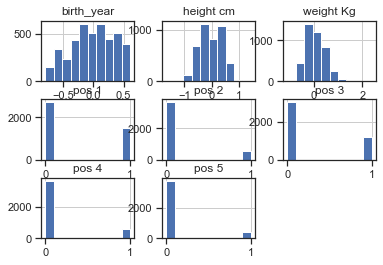

In [624]:
nba_rob_scaled.hist()
plt.show()

* A continuació Standaritzem els datasets tenint en compte els outliers fent el capping amb IQR: 

In [630]:
# Definim quin tipus d'escaclat utilitzarem
scaler = prp.RobustScaler(unit_variance=True, quantile_range=(25.0,75.0))
# Apliquem l'escalat a les variables desitjates
scaler_fit = scaler.fit(nba_outliers)
# mostrem els parametres obtinguts:
standarization_analisis = pd.DataFrame([scaler.scale_, scaler.center_], columns=nba_outliers.columns, index=['scale', 'center'])
print(scaler_fit)
print(scaler.get_params())
standarization_analisis

RobustScaler(unit_variance=True)
{'copy': True, 'quantile_range': (25.0, 75.0), 'unit_variance': True, 'with_centering': True, 'with_scaling': True}


,birth_year,height cm,weight Kg,pos 1,pos 2,pos 3,pos 4,pos 5
scale,23.72,11.12,12.11,0.74,0.74,0.74,0.74,0.74
center,1961.00,198.00,92.99,0.00,0.00,0.00,0.00,0.00


In [632]:
# Creem un nou dataframe amb els valors normalitzats 
nba_rob_scaled = scaler.transform(nba_outliers)
nba_rob_scaled = pd.DataFrame(nba_rob_scaled, columns=nba_outliers.columns, index=nba_outliers.index)
nba_rob_scaled.describe()

,birth_year,height cm,weight Kg,pos 1,pos 2,pos 3,pos 4,pos 5
count,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00
mean,-0.04,-0.07,0.10,0.48,0.17,0.38,0.18,0.13
std,0.90,0.81,0.95,0.65,0.45,0.61,0.46,0.40
min,-2.02,-3.42,-2.70,0.00,0.00,0.00,0.00,0.00
25%,-0.67,-0.72,-0.60,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.67,0.63,0.75,1.35,0.00,1.35,0.00,0.00
max,1.56,2.97,5.81,1.35,1.35,1.35,1.35,1.35


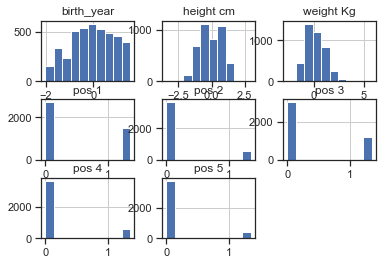

In [633]:
nba_rob_scaled.hist()
plt.show()

Comentari General: 

Obervem com al aplicar un tractament per treure outliers als atributs genrats per dummy data es generen resultats incongruents ja que com les variables están representades per valors binaris quan un atribut te poca representació els valors infrarepresentats s'entenen com a outliers lo que accentua encara més la seva infrarepresentació. 